## <h2 style="font-size: 1.6em; font-weight: bold;"> 1. Data Collection </h2>
Import Required Packages and Data

**Importing Pandas, Numpy, Matplotlib, Seaborn, Plotly.express and Warings Library.**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [5]:
df = pd.read_csv('data/nordic_transactions_with_fraud.csv')
df.head()

,transaction_id,transaction_date,booking_date,value_date,payment_date,amount,currency,from_account_id,from_account_name,from_account_country,...,counterparty_bank_bic,counterparty_business_type,narrative,payment_purpose_code,related_trade_invoice_id,swift_message_type,transaction_status,transaction_type_description,end_to_end_identification,is_fraud
0,834c5abc-8dcc-4ccd-886f-362b8158a64d,2025-04-14,2025-04-15,2025-04-15,2025-04-17,140169.73,SEK,GB13UGOK63554643497199,"Andrews, Orozco and Rosales",NO,...,HANDFIHH,Electronics,Invoice for electronic parts,Goods,NaN,MT103,billed,Wire Transfer,e6a20348-3abf-4bbc-b5d0-418574b1fdf7,1
1,53b74d05-26bd-470a-a51d-00989fe6ecdf,2025-12-26,2025-12-26,2025-12-27,2025-12-30,318303.17,SEK,GB69AKBR67543659201137,Brooks LLC,SE,...,HANDFIHH,Consulting,morph cross-platform functionalities,Goods,NaN,MT940,failed,Direct Debit,eaf6087a-6ce5-4a8c-ae46-8edd41fef601,0
2,29f9aa86-de14-4dd2-b527-87bf5c21c426,2025-04-07,2025-04-07,2025-04-08,2025-04-08,19395.92,DKK,GB62DOXH80660432457726,Garcia PLC,DK,...,HANDFIHH,Agriculture,incubate cross-platform interfaces,Salary,NaN,MT103,billed,Card Payment,cb85e8cf-0cd9-43ec-93b5-9be80d7d63ae,0
3,b340c644-8c26-45f5-b600-997a4e234646,2025-07-03,2025-07-03,2025-07-03,2025-07-03,220571.52,EUR,GB22COCQ28390800119651,White-Woods,FI,...,HANDFIHH,Shipping,embrace plug-and-play eyeballs,Goods,NaN,MT103,failed,BG-LI-LÖN,NaN,0
4,547f0f37-55ab-4641-8e31-15196ffc2473,2025-10-28,2025-10-29,2025-10-30,2025-10-31,296657.76,SEK,GB23YJUM94655999407860,"Powell, Eaton and Harris",SE,...,NOKANO21,Electronics,exploit B2B e-commerce,Unknown,NaN,MT940,failed,Card Payment,8eea3cb7-9b0a-4e8e-a316-e75895141fa5,0


**Shape of the dataset**

In [6]:
df.shape

(10325, 25)

We have a dataset with 10,300 records and 26 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  10325 non-null  object 
 1   transaction_date                10325 non-null  object 
 2   booking_date                    10325 non-null  object 
 3   value_date                      10325 non-null  object 
 4   payment_date                    10325 non-null  object 
 5   amount                          10325 non-null  float64
 6   currency                        10325 non-null  object 
 7   from_account_id                 10325 non-null  object 
 8   from_account_name               10325 non-null  object 
 9   from_account_country            10325 non-null  object 
 10  from_account_business_type      10028 non-null  object 
 11  from_account_expected_turnover  10325 non-null  float64
 12  counterparty_account_id         

## <h2 style="font-size: 1.6em; font-weight: bold;"> 2. Data Wrangling </h2>
- Handled missing values
- Removed duplicate entries
- Verified and adjusted data types
- Filtered billed data
- Generated dataset statistics
- Converted amounts to EUR using exchange rates from the Riskbanken open API

**Create a Copy of the Dataset**

In [8]:
df_copy= df.copy()

**2.1 Handled Missing Values**

In [9]:
df_copy.isnull().sum()
df_copy.isnull().sum()*100/ len(df)

transaction_id                     0.000000
transaction_date                   0.000000
booking_date                       0.000000
value_date                         0.000000
payment_date                       0.000000
amount                             0.000000
currency                           0.000000
from_account_id                    0.000000
from_account_name                  0.000000
from_account_country               0.000000
from_account_business_type         2.876513
from_account_expected_turnover     0.000000
counterparty_account_id            0.000000
counterparty_name                  4.552058
counterparty_country               0.000000
counterparty_bank_bic              0.000000
counterparty_business_type         0.000000
narrative                          4.716707
payment_purpose_code               0.000000
related_trade_invoice_id          68.445521
swift_message_type                 0.000000
transaction_status                 0.000000
transaction_type_description    

Column names and the percentage of missing values for each column:
- `from_account_business_type` 2.9%
- `counterparty_name`          4.6%
- `narrative `          4.7%
- `related_trade_invoice_id`   68.4%
- `end_to_end_identification`  47.4% 


Replace missing values with 0

In [10]:
df_copy.fillna(0,inplace=True)
df_copy.isnull().sum()

transaction_id                    0
transaction_date                  0
booking_date                      0
value_date                        0
payment_date                      0
amount                            0
currency                          0
from_account_id                   0
from_account_name                 0
from_account_country              0
from_account_business_type        0
from_account_expected_turnover    0
counterparty_account_id           0
counterparty_name                 0
counterparty_country              0
counterparty_bank_bic             0
counterparty_business_type        0
narrative                         0
payment_purpose_code              0
related_trade_invoice_id          0
swift_message_type                0
transaction_status                0
transaction_type_description      0
end_to_end_identification         0
is_fraud                          0
dtype: int64

**2.2 Removed Duplicate Entries**

In [11]:
df_copy.duplicated().sum()

200

The data has 200 duplicate records. Drop all duplicate entries.

In [12]:
df_copy.drop_duplicates(inplace=True)
df_copy.duplicated().sum()

0

**2.3 Verified and adjusted data types**

Convert  `transaction_date`, `booking_date`, `value_date`, and `payment_date` from object type to datetime format

In [13]:
df_copy['transaction_date'] = pd.to_datetime(df_copy['transaction_date'])
df_copy['booking_date'] = pd.to_datetime(df_copy['booking_date'])
df_copy['value_date'] = pd.to_datetime(df_copy['value_date'])
df_copy['payment_date'] = pd.to_datetime(df_copy['payment_date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10125 entries, 0 to 10324
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   transaction_id                  10125 non-null  object        
 1   transaction_date                10125 non-null  datetime64[ns]
 2   booking_date                    10125 non-null  datetime64[ns]
 3   value_date                      10125 non-null  datetime64[ns]
 4   payment_date                    10125 non-null  datetime64[ns]
 5   amount                          10125 non-null  float64       
 6   currency                        10125 non-null  object        
 7   from_account_id                 10125 non-null  object        
 8   from_account_name               10125 non-null  object        
 9   from_account_country            10125 non-null  object        
 10  from_account_business_type      10125 non-null  object        
 11  from_ac

**2.4 Filtered billed data**

In [14]:
df_copy = df_copy.loc[df_copy['transaction_status']=='billed']
df_copy.shape

(3754, 25)

After filtering for billed transactions, the dataset comprises 3,754 records across 25 features.

Data types:

- Numeric: 3 (including amount, from_account_expected_turnover, is_fraud)

- Categorical/Object: 22

 
 **2.5 Standardized transaction amounts to EUR using the open API from Riskbanken**

In [15]:
from datetime import datetime, timedelta
import urllib.request, json

# Get date (2025-04-30)
single_date = datetime.today() - timedelta(days=12)
date_str = single_date.strftime('%Y-%m-%d')

# Ensure all currency codes are uppercase
currencies = df_copy['currency'].unique()

# Build currency-to-series map
currency_to_series = {
    cur: f'SEK{cur}PMI' if cur != 'SEK' else 'SEK'
    for cur in currencies
}

rate_dict = {}

# Loop to fetch exchange rates
for cur in currencies:
    if cur == 'EUR':
        rate_dict[cur] = 1.0  # EUR to EUR
        continue
    if cur == 'SEK':
        series1 = 'SEK'
    else:
        series1 = currency_to_series[cur]

    series1 = currency_to_series[cur]
    url = f'https://api.riksbank.se/swea/v1/CrossRates/{series1}/SEKEURPMI/{date_str}/{date_str}'

    try:
        req = urllib.request.Request(url)
        req.get_method = lambda: 'GET'
        response = urllib.request.urlopen(req)
        content = response.read()
        data = json.loads(content)

        # Handle different JSON structures
        if isinstance(data, list) and data:
            rate = data[0]['value']
            rate_dict[cur] = float(rate)
        elif isinstance(data, dict) and 'value' in data:
            rate_dict[cur] = float(data['value'])
        else:
            rate_dict[cur] = 1.0

    except Exception as e:
        print(f"Error fetching rate for {cur}: {e}")
        rate_dict[cur] = 1.0

# Apply conversion to EUR
df_copy['amount_eur'] = df_copy.apply(
    lambda x: float(x['amount']) if x['currency'].upper() == 'EUR'
    else (
        float(x['amount']) / rate_dict.get('SEK', 1.0) if x['currency'].upper() == 'SEK'
        else float(x['amount']) * rate_dict.get(x['currency'].upper(), 1.0)
    ),
    axis=1
)

df_copy[['amount', 'currency','amount_eur']]


,amount,currency,amount_eur
0,140169.73,SEK,12775.803673
2,19395.92,DKK,2598.665362
5,38995.10,USD,34287.611528
11,39758.61,USD,34958.950601
14,52251.52,USD,45943.716506
...,...,...,...
10314,320704.14,SEK,29230.655790
10316,10626.53,NOK,899.865187
10318,405804.95,DKK,54369.747201
10319,147365.70,SEK,13431.682085


We now have a new column that standardizes all transaction amounts in EUR. Time to dig in and uncover what secrets the data has been hiding.

## <h2 style="font-size: 1.6em; font-weight: bold;"> 3. Exploratory Data Analysis (EDA) </h2>

- Descriptive analytics: Queried the dataset using SQLite3 to understand its structure and key metrics.
- Data Distribution, Outlier Detection & Handling 
- Correlations
- Removed irrelevant columns 

**3.1 Descriptive analytics using SQL**

**Purpose:** From a business perspective, define insights: "what the data tells us?". Broken down into two components:

- Overview of Key Metrics: 

       What are the lowest and highest amounts of fraudulent transactions?

       How many fraud vs. non-fraud transactions and their percentage?

- Transaction Trends and Behavior:

       How many transactions were sent inside vs. outside the Nordic region?

       What are the seasonal trends for fraudulent transactions?

       How do fraudulent accounts behave?

In [16]:
!pip install ipython-sql
import sqlite3

# Connect to created in-memory database
con = sqlite3.connect(':memory:')
df_copy.to_sql ('nordic_transactions_with_fraud', con, index=False)

3754

*What are the lowest and highest amounts of fraudulent transactions?*

In [17]:
query = '''
Select 'lowest_transaction' as category, from_account_name, counterparty_country,currency, amount_eur, is_fraud 
From 
(Select *
From nordic_transactions_with_fraud
Where is_fraud = '1'
Order by amount_eur asc
Limit 1)

UNION ALL
Select 'highest_transaction' as category, from_account_name, counterparty_country,currency, amount_eur, is_fraud 
From 
(Select *
From nordic_transactions_with_fraud
Where is_fraud = '1'
Order by amount_eur desc
Limit 1)

'''

df_result = pd.read_sql_query(query, con)
df_result

,category,from_account_name,counterparty_country,currency,amount_eur,is_fraud
0,lowest_transaction,Mendez-Smith,HK,SEK,9126.258944,1
1,highest_transaction,Reed-Gonzales,RU,EUR,495108.260000,1


**Insight:**

- Fraudulent amounts span from low (small test transfers) to high (attempts to extract large sums).
- Both the lowest and highest transaction amounts were sent to high-risk countries, based on sanctions and the 2025 trade tension tariff threats.

- The data is imbalanced, so transformation needs to be performed before training.

*How many fraud vs. non-fraud transactions and their percentage?*

In [18]:
query = '''
Select 
is_fraud, count (*) as transaction_count,
Round (100 * COUNT(*) / 3754,2) as percentage
From nordic_transactions_with_fraud
Group by is_fraud
'''

df_result = pd.read_sql_query (query, con)
df_result

,is_fraud,transaction_count,percentage
0,0,3454,92.0
1,1,300,7.0


**Insight:**   

- Fraud is likely a small percentage (7.0%) compared to 93% of non-fraudulent transactions.

*How many transactions were sent inside vs. outside the Nordic region?*

In [74]:
query = '''
Select region, count (*) as transaction_count, 
Round (100* count (*)/ 3754, 2) as percentage
From 
(Select *,
Case when counterparty_country IN ('SE', 'NO', 'FI', 'DK', 'IS') Then 'Nordic' else 'non_Nordic' End as region
From nordic_transactions_with_fraud
)
Group by region
'''
df_result = pd.read_sql_query (query, con)
df_result

,region,transaction_count,percentage
0,Nordic,1587,42.0
1,non_Nordic,2167,57.0


**Insight:**  

- 57% of transactions were sent outside the Nordic region, indicating a higher volume of international activity.

**Suggestion:** 

- A stronger focus on global operations.

 *What are the seasonal trends for fraudulent transactions?*

In [75]:
query = '''
Select 
strftime('%m', transaction_date) AS transaction_month, count (*) as transaction_count, 
Row_number() OVER (ORDER BY count (*) DESC) AS rank
From nordic_transactions_with_fraud
WHERE is_fraud = 1
Group by transaction_month
Order by transaction_month ASC

'''
df_result = pd.read_sql_query (query, con)
df_result

,transaction_month,transaction_count,rank
0,04,31,7
1,05,36,4
2,06,27,8
3,07,36,3
4,08,31,6
5,09,24,9
6,10,33,5
7,11,37,2
8,12,45,1


In [71]:
import plotly_express as px
fig = px.line( df_result, x='transaction_month', y='transaction_count', markers=True,  color_discrete_sequence=px.colors.qualitative.Light24
)
fig.update_layout(title='Monthly Fraudulent Transaction Count')
fig.show()

**Insight:**

- Fraudulent activity showed a notable upward trend.

- December has the highest number of fraudulent transactions, which can materially affect the financial report.

- The beginning of trade tensions (April to May 2025) saw a slight increase in fraudulent transactions, which then dropped in June, possibly indicating a testing phase of fraudulent activity.

- After a decline in September, fraudulent transactions sharply increased.

**Suggestion:**

- Implement heightened fraud detection and monitoring systems during the end-of-year months.

- Focus on trade-related transactions, especially during geopolitical instability.


**3.2 Data Distribution, Outlier Detection & Handling**

In [97]:
df_copy.describe()

,transaction_date,booking_date,value_date,payment_date,amount,from_account_expected_turnover,is_fraud,amount_eur
count,3754,3754,3754,3754,3754.000000,3.754000e+03,3754.000000,3754.000000
mean,2025-08-17 05:47:31.997868800,2025-08-18 04:41:56.355887360,2025-08-18 16:48:50.633990144,2025-08-20 03:33:16.590304,235133.511620,8.459075e+05,0.079915,86354.912759
min,2025-04-02 00:00:00,2025-04-02 00:00:00,2025-04-02 00:00:00,2025-04-02 00:00:00,359.630000,5.000191e+04,0.000000,32.778563
25%,2025-06-13 00:00:00,2025-06-14 00:00:00,2025-06-15 00:00:00,2025-06-16 00:00:00,96284.762500,2.332640e+05,0.000000,18681.233340
50%,2025-08-16 00:00:00,2025-08-17 00:00:00,2025-08-17 00:00:00,2025-08-18 00:00:00,227691.935000,7.962714e+05,0.000000,33252.249465
75%,2025-10-26 00:00:00,2025-10-27 00:00:00,2025-10-27 00:00:00,2025-10-29 00:00:00,365148.350000,1.391445e+06,0.000000,61537.795103
max,2025-12-30 00:00:00,2026-01-01 00:00:00,2026-01-02 00:00:00,2026-01-05 00:00:00,499961.170000,1.999250e+06,1.000000,499959.970000
std,NaN,NaN,NaN,NaN,149826.829183,6.206570e+05,0.271197,124582.882511


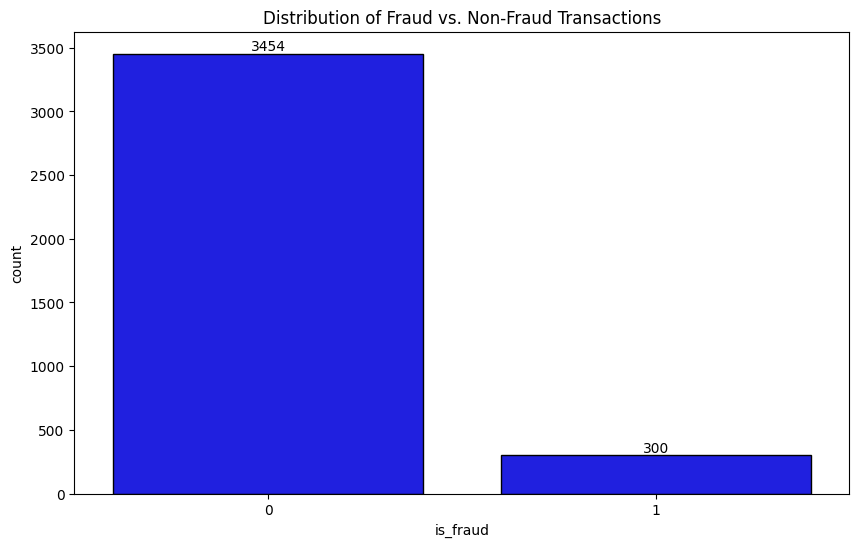

In [95]:
fraud_counts = df_copy['is_fraud'].value_counts().sort_index()
fraud_df = fraud_counts.reset_index()
fraud_df.columns = ['is_fraud','count']

plt.figure (figsize=(10,6))
ax = sns.barplot(fraud_df, x='is_fraud', y='count',color='blue', edgecolor='black')

for index,row in fraud_df.iterrows():
    ax.text (x=index, y=row['count'] + 0.5, s=int(row['count']), ha='center', va='bottom')

plt.title ("Distribution of Fraud vs. Non-Fraud Transactions")
plt.show()

In [96]:
import plotly.express as px
fig=px.histogram (df_copy['amount_eur'], x='amount_eur', title= 'Transaction Amount Distribution')
fig.update_traces(marker=dict (line = dict (color='black', width=1)))
fig.show()

## <h2 style="font-size: 1.6em; font-weight: bold;"> 4. Feature Engineering </h2>
 
 Created new columns including `turnover_jump_pct`, `risky_flag`, `split_payment` using
 - NLP
 - Time Series Analysis

`turnover_jump_pct`

Calculate the Turnover Jump % to spot any unusual spikes in transaction volumes that could indicate suspicious activity.

In [ ]:
df_copy['turnover_jump_pct'] = ((df_copy['amount_eur'])*100) / df_copy['from_account_expected_turnover'] 
df_copy [['amount', 'currency','amount_eur', 'from_account_expected_turnover', 'turnover_jump_pct']]

In [ ]:
count_turnover_jump = (df_copy['turnover_jump_pct'] > 100).sum ()
count_turnover_jump

We found 209 transactions with a turnover jump percentage over 100%.

`risky_flag`

We will flag all transactions sent to risky countries (as defined by sanctions and potential tariff threats)


In [ ]:
risky_countries = ['HK', 'SG', 'CN', 'RU']
df_copy['risky_flag'] = df_copy['counterparty_country'].isin(risky_countries).astype(int)

df_copy[['counterparty_country','risky_flag']]

In [ ]:
count_risky_flag = (df_copy['risky_flag'] == 1).sum()
count_risky_flag

We found 1,117 transactions sent to risky countries.

`split_payment`

To flag slip_payment, we applied business rules to identify accounts that show any of these signs:

- Made multiple payments within a single day.

- Had repeated or similar transaction amounts

- Made more than a set number of payments (high frequency).

In [ ]:
# Case 1: Made multiple payments within a single day
df_copy['time_diff'] = df_copy.groupby('from_account_name')['payment_date'].diff()
df_copy['is_sequential'] = (df_copy['time_diff'] <= pd.Timedelta(days=1)).astype(int)

# Case 2: Had repeated or similar transaction amounts
df_copy['is_repeated_amount'] = df_copy.groupby('from_account_name')['amount_eur'].transform(
    lambda x: x.duplicated(keep=False)
).astype(int)

# Case 3: Made more than 3 payments (high frequency)
txn_count = df_copy.groupby('from_account_name')['transaction_id'].transform('count')
df_copy['is_high_frequency'] = (txn_count >= 3).astype(int)

# Final flag: if any condition is met
df_copy['split_payment_flag'] = ( df_copy['is_sequential'] | df_copy['is_repeated_amount'] | df_copy['is_high_frequency']
)

count_split_payment = (df_copy['split_payment_flag'] ==1).sum()
count_split_payment

We have 238 transactions marked as split payments.

In [ ]:
df_copy.shape
df_copy.info()

In [ ]:
df_copy.drop(['transaction_id','currency','amount','from_account_id', 'from_account_expected_turnover','counterparty_account_id','counterparty_bank_bic', 'narrative', 'end_to_end_identification', 'related_trade_invoice_id','booking_date','value_date','transaction_date','payment_purpose_code','fx_conversion_flag', 'swift_message_type', 'transaction_type_description','time_diff' ],inplace=True, axis=1)

In [ ]:
df_copy.info()

**Insight**
+ The `amount_eur` column includes both small and very large transactions, showing a wide variety of payment types.
+ The data is likely right-skewed, meaning most transactions are small, but a few large outliers are pulling the average up.

*Outlier Detection*

As you see, `amount_eur` is skewed, so we will use IQR method (Interquartile Range) to find outliers


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_copy['amount_eur'].quantile(0.25)
Q3 = df_copy['amount_eur'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_copy[(df_copy['amount_eur'] < lower_bound) | (df_copy['amount_eur'] > upper_bound)]   
outliers.shape

`amount_eur` contains 718 records identified as outliers.

*Box-Cox Transformation*